# <center> Miscellaneous </center>

klik untuk [Open in colab](https://colab.research.google.com/github/ferdinand-winstein/py-dts/blob/master/2022/PE2%20Module%204%20-%20Miscellaneous.ipynb) 


# Materi Modul

- Generators, iterators and closures
- Working with file-system, directory tree and files
- Selected Python Standard Library modules (os, datetime, time, and calendar.)



# Generators, Iterators, Closures
- Generator : suatu kode yang mampu menghasilkan serangkaian nilai untuk mengontrol proses iterasi 
- Iterator : cara di mana suatu objek harus berperilaku agar sesuai dengan aturan yang diberlakukan oleh konteks pernyataan `for` dan `in` (seringkali disamaartikan dengan generator, namun dalam konteks lebih sempit)
- closures : membuat fungsi dari fungsi dengan beberapa nilai tersimpan dalam fungsi baru

## Generator & Iterator

Contoh generator yang sudah sering kita temui adalaha `range` 

In [ ]:
print(range(5))
print(type(range(5)))
print(list(range(5)))

### Membuat `range` kita sendiri

membuat `range` kita sendiri dengan fungsi (bukan generator)

In [ ]:
def rentangfun(n):
    lst = []
    i = 0
    while i < n:
        lst.append(i)
        i +=1
    return lst

print(rentangfun(5))
print(type(rentangfun(5)))

Membuat `range` kita sendiri dengan generator berbasis obyek

In [ ]:
class rentang:
    def __init__(self,n):
        self.n = n
        self.i = 0
    def __iter__(self):
        return self
    def __next__(self):
        self.i += 1
        if self.i > self.n:
            raise StopIteration
        return self.i - 1
    
print(rentang(5))
print(type(rentang(5))) 
print(list(rentang(5)))

In [ ]:
class prime:
    def __init__(self,n):
        self.n = n
        self.counter = 0
        self.prime = 1
    def __iter__(self):
        return self
    
    def __next__(self):
        #program utk cek self.prime itu prima atau tidak
        cek = False
        while cek == False and self.prime != 1:
            cek = True
            for i in range(2,self.prime):
                if self.prime % i == 0:
                    cek = False
            self.prime += 1
        
        if self.prime == 1:
            self.prime += 1
            return 1
        if self.counter >= self.n-1:
            raise StopIteration
        self.counter += 1
        return self.prime - 1
    
for i in prime(10):
    print(i)

Contoh : Membuat generator untuk deret bilangan fibbonaci

In [ ]:
class Fib:
    def __init__(self, nn):
        self.__n = nn
        self.__i = 0
        self.__p1 = self.__p2 = 1

    def __iter__(self):
        print("Fib iter")
        return self

    def __next__(self):
        self.__i += 1
        if self.__i > self.__n:
            raise StopIteration
        if self.__i in [1, 2]:
            return 1
        ret = self.__p1 + self.__p2
        self.__p1, self.__p2 = self.__p2, ret
        return ret

In [ ]:
for i in Fib(100):
    print(i)

### `yield` Statement

Penggunaan `yield` menggantikan return pada function mengubah function menjadi generator 

In [ ]:
def rentangyield(n):
    i = 0
    while i < n:
        i +=1
        yield i-1

print(rentangyield(5))
print(type(rentangyield(5)))
print(list(rentangyield(5)))

In [ ]:
def fun(n):
    for i in range(n):
        yield i
        
for i in fun(5):
    print(i)

In [ ]:
def prime(n):
    i = 1
    counter = 0
    while counter < n:
        if i == 1:
            yield 1
            i += 1
        else:
            cek = False
            while cek == False:
                cek = True
                for j in range(2,i):
                    if i % j == 0:
                        cek = False
                i += 1
            yield i - 1
        counter += 1
    
print(list(prime(10)))

### The Fibanacci number generator

In [ ]:
def fibonacci(n):
    p = pp = 1
    for i in range(n):
        if i in [0, 1]:
            yield 1
        else:
            n = p + pp
            pp, p = p, n
            yield n

fibs = list(fibonacci(10))
print(fibs)

### Build your own generator

In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2
        

for v in powers_of_2(8):
    print(v)

### List comprehensions

In [ ]:
lst = [0,1,2,3,4,5,6,7,8,9,10]
print(lst)

lst = []
for i in range(11):
    lst.append(i)
print(lst)  

lst = [i for i in range(11)]
print(lst)  

In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2

t = [x for x in powers_of_2(5)]
print(t)

### <code>list()</code> function

In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2

t = list(powers_of_2(3))
print(t)

### The <code>in</code> operator

In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2

for i in range(20):
    if i in powers_of_2(4):
        print(i)

### More about list comprehensions

a simple and very impressive way of creating lists and their contents.

In [ ]:
list_1 = []

for ex in range(6):
    list_1.append(10 ** ex)

list_2 = [10 ** ex for ex in range(6)]

print(list_1)
print(list_2)


### list comprehension with conditional expression

In [ ]:
the_list = []

for x in range(10):
    if x % 2 == 0:
        r = 1
    else:
        r = 0
    the_list.append(r)

print(the_list)

In [ ]:
the_list = []

for x in range(10):
    r = 1 if x % 2 == 0 else 0
    # r = value_if_true IF condition ELSE value_if_false
    the_list.append(r)

print(the_list)

In [ ]:
the_list = []

for x in range(10):
    the_list.append(1 if x % 2 == 0 else 0)

print(the_list)

In [ ]:
the_list = [1 if x % 2 == 0 else 0 for x in range(10)]

print(the_list)

### `lambda` function

nama_fungsi = `lambda` parameter : return_value 

In [ ]:
two = lambda: 2
sqr = lambda x: x * x
pwr = lambda x, y: x ** y

for a in range(-2, 3):
    print(sqr(a), end=" ")
    print(pwr(a, two()))

#### Penggunaan lambda function
Penggunaan lambda muncul saat Anda dapat menggunakannya dalam bentuk pure - sebagai bagian kode anonim yang dimaksudkan untuk mengevaluasi hasil. 

In [ ]:
def print_function(args, fun):
    for x in args:
        print('f(', x,')=', fun(x), sep='')


def poly(x):
    return 2 * x**2 - 4 * x + 2


print_function([x for x in range(-2, 3)], poly)

### `map`

In [ ]:
list1 = [x for x in range(5)]
list2 = list(map(lambda x: 2 ** x, list1))

print(list1)
print(list2)

### `filter`

In [ ]:
from random import seed, randint
seed(0)

data = [ randint(-10,10) for x in range(5) ]
filtered = list(filter(lambda x: x > 0 and x % 2 == 0, data))

print(data)
print(filtered)

## Closure
closure adalah teknik yang memungkinkan penyimpanan nilai meskipun pada kenyataannya konteks di mana nilai tersebut dibuat sudah tidak ada lagi. 
```
def NAMA_CLOSURE(PARAMETER_CLOSURE):
    ...
    def NAMA_INNER_FUNGSI(PARAMATER_FUNGSI):
        ...
        return RETURN_VALUE
    return NAMA_INNER_FUNGSI

NAMA_FUNGSI = NAMA_CLOSURE(PARAMETER)
NAMA_FUNGSI(PARAMATER_FUNGSI)
```

In [ ]:
def outer(par):
    def inner():
        return par *10
    return inner

var = 45
fun = outer(var)
print(fun())

In [ ]:
def make_closure(par):
    loc = par

    def power(p):
        return p ** loc
    return power


f2 = make_closure(2)
f3 = make_closure(3)

for i in range(5):
    print(i, f2(i), f3(i))

# Files (file streams, file processing, diagnosing stream problems) 

## Accessing files from Python code
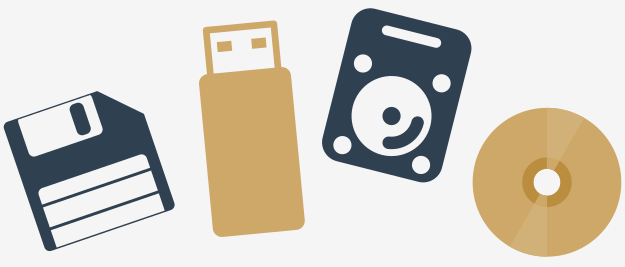

Salah satu masalah paling umum dalam pekerjaan pengembang adalah memproses data yang disimpan dalam file sementara file tersebut biasanya disimpan secara fisik menggunakan perangkat penyimpanan - hard disk, optik, jaringan, atau solid-state.

Sangat mudah untuk membayangkan program yang mengurutkan 20 angka, dan sama mudahnya untuk membayangkan pengguna program ini memasukkan dua puluh angka ini langsung dari keyboard.

Jauh lebih sulit membayangkan tugas yang sama ketika ada 20.000 nomor yang harus diurutkan, dan tidak ada satu pengguna pun yang dapat memasukkan nomor-nomor ini tanpa membuat kesalahan.

Jauh lebih mudah untuk membayangkan bahwa angka-angka ini disimpan dalam file disk yang dibaca oleh program. Program ini mengurutkan nomor dan tidak mengirimkannya ke layar, melainkan membuat file baru dan menyimpan urutan nomor yang diurutkan di sana.

Jika kita ingin mengimplementasikan database sederhana, satu-satunya cara untuk menyimpan informasi antar program berjalan adalah dengan menyimpannya ke dalam file (atau banyak file jika database Anda lebih kompleks). 



### Perhatikan filename sesuai dengan OS yang digunkaan
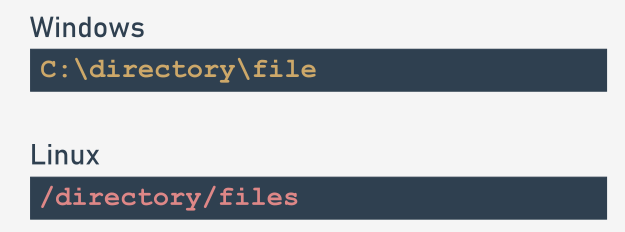

### FileStream
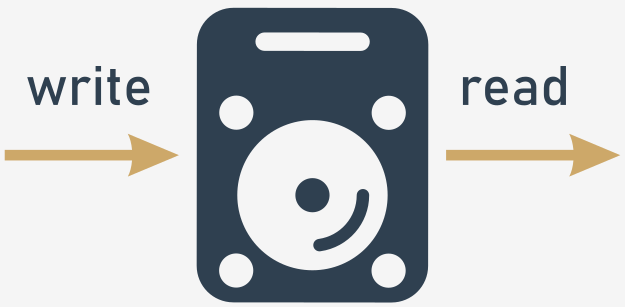
Ada dua operasi dasar yang dilakukan di stream:

- membaca dari stream: bagian data diambil dari file dan ditempatkan di area memori yang dikelola oleh program (misalnya, variabel);
- menulis/write ke stream: bagian data dari memori (misalnya, variabel) ditransfer ke file.

Ada tiga mode dasar yang digunakan untuk membuka stream:

- mode baca: stream yang dibuka dalam mode ini memungkinkan operasi baca saja; mencoba menulis ke stream akan menyebabkan pengecualian (pengecualian bernama UnsupportedOperation, yang mewarisi OSError dan ValueError, dan berasal dari modul io);
- mode tulis: stream yang dibuka dalam mode ini memungkinkan operasi tulis saja; mencoba membaca stream akan menyebabkan pengecualian yang disebutkan di atas;
- mode update: stream yang dibuka dalam mode ini memungkinkan penulisan dan pembacaan. 

### File handles
Python mengasumsikan bahwa setiap file tersembunyi di balik objek dengan kelas yang memadai. 

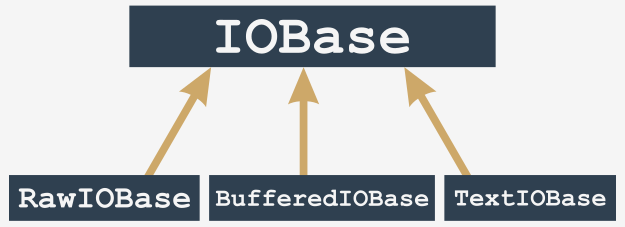

Untuk tujuan pembelajaran, kita hanya akan memperhatikan stream yang diwakili oleh objek BufferIOBase dan TextIOBase


### text & biner

Aliran teks yang terstruktur dalam baris; artinya, file berisi karakter tipografi (huruf, angka, tanda baca, dll.) yang disusun dalam baris (garis), seperti yang terlihat dengan mata telanjang saat Anda melihat konten file di editor.

File ini ditulis (atau dibaca) sebagian besar karakter demi karakter, atau baris demi baris.

Aliran biner tidak berisi teks tetapi urutan byte dari nilai apa pun. Urutan ini dapat berupa, misalnya, program yang dapat dijalankan, gambar, audio atau klip video, file database, dll. 

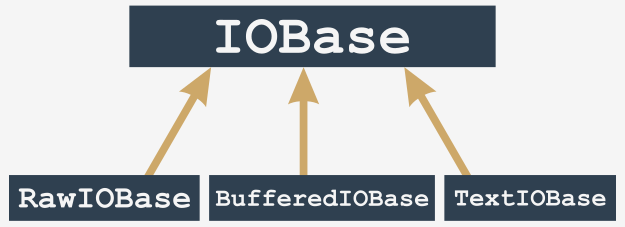

### `open()` dan `close()`

In [ ]:
#buat file pada desktop dengan nama file.txt
try:
    #sesuaikan dengan direktori dekstop
    stream = open(r"C:\Users\Winstein\Documents\GitHub\py-dts\contoh.txt", "rt") 
    # Processing goes here.
    stream.close()
except Exception as exc:
    print("Cannot open the file:", exc)


### Pre-opened streams

Kami mengatakan sebelumnya bahwa operasi aliran apa pun harus didahului oleh pemanggilan fungsi open (). Ada tiga pengecualian yang ditentukan dengan baik untuk aturan tersebut.

Saat program kami dimulai, ketiga aliran sudah dibuka dan tidak memerlukan persiapan tambahan. Terlebih lagi, program Anda dapat menggunakan aliran ini secara eksplisit jika Anda berhati-hati dalam mengimpor modul sys: 

<code> import sys </code>

karena di situlah deklarasi tiga aliran ditempatkan.

Nama aliran ini adalah: <code>sys.stdin</code>, <code>sys.stdout</code>, dan <code>sys.stderr</code>.

Mari kita analisis mereka:

- sys.stdin
  - stdin (sebagai input standar)
  - aliran stdin biasanya dikaitkan dengan keyboard, pra-buka untuk membaca dan dianggap sebagai sumber data utama untuk program yang sedang berjalan;
  - fungsi input () yang terkenal membaca data dari stdin secara default.

- sys.stdout
  - stdout (sebagai keluaran standar)
  - aliran stdout biasanya dikaitkan dengan layar, pre-open untuk menulis, dianggap sebagai target utama untuk mengeluarkan data oleh program yang sedang berjalan;
  - fungsi print () yang terkenal mengeluarkan data ke stream stdout.

- sys.stderr
  - stderr (sebagai keluaran kesalahan standar)
  - stream stderr biasanya dikaitkan dengan layar, pra-buka untuk menulis, dianggap sebagai tempat utama di mana program yang sedang berjalan harus mengirimkan informasi tentang kesalahan yang ditemui selama bekerja;
  - pemisahan stdout (hasil berguna yang dihasilkan oleh program) dari stderr (pesan kesalahan, tidak dapat disangkal berguna tetapi tidak memberikan hasil) memberikan kemungkinan untuk mengarahkan kedua jenis informasi ini ke target yang berbeda. Diskusi yang lebih luas tentang masalah ini berada di luar cakupan kursus. Buku pegangan sistem operasi akan memberikan lebih banyak informasi tentang masalah ini. 


### Diagnosing stream problems

Objek IOError dilengkapi dengan properti bernama errno (nama berasal dari nomor kesalahan frase) dan Anda dapat mengaksesnya sebagai berikut: 

- errno.EACCES → Permission denied
- errno.EBADF → Bad file number
- errno.EEXIST → File exists
- errno.EFBIG → File too large
- errno.EISDIR → Is a directory
- errno.EMFILE → Too many open files
- errno.ENOENT → No such file or directory
- errno.ENOSPC → No space left on device

In [ ]:
try:
    # Some stream operations.
    s = open("c:/users/user/Desktop/file.txt", "rt")
except IOError as exc:
    print(exc.errno)

### `strerror()`

In [ ]:
import errno

try:
    s = open("c:/users/user/Desktop/file.txt", "rt")
    # Actual processing goes here.
    s.close()
except Exception as exc:
    if exc.errno == errno.ENOENT:
        print("The file doesn't exist.")
    elif exc.errno == errno.EMFILE:
        print("You've opened too many files.")
    else:
        print("The error number is:", exc.errno)


In [ ]:
from os import strerror

try:
    s = open("c:/users/user/Desktop/file.txt", "rt")
    # Actual processing goes here.
    s.close()
except Exception as exc:
    print("The file could not be opened:", strerror(exc.errno))

## Working with Real files

file mode:



|Text mode |	Binary mode |	Description|
|-----------|-----------------|-------------|
|rt|	rb|	read|
|wt|	wb|	write|
|at	|ab	|append|
|r+t|	r+b|	read and update|
|w+t	|w+b|	write and update|

### File Methods
* Read methods

```python
stream.read(idx)
stream.readline()
stream.readlines(n) #multiple lines

```

* write methods

```python
stream.write(str)
```

In [ ]:
stream = open(r"contoh.txt", "rt")
print(stream.read())
stream.close()

In [ ]:
s = open("contoh.txt", "rt")

In [ ]:
x = s.readlines()
s.close()

In [ ]:
x[8][3]

### `read()`

In [ ]:
from os import strerror

try:
    cnt = 0
    s = open("contoh.txt", "rt")
    ch = s.read(1)
    while ch != '':
        print(ch, end='')
        cnt += 1
        ch = s.read(1)
    s.close()
    print("\n\nCharacters in file:", cnt)
except IOError as e:
    print("I/O error occurred: ", strerr(e.errno))

### `readline()`

In [ ]:
from os import strerror

try:
    ccnt = lcnt = 0
    s = open("contoh.txt", "rt")
    line = s.readline()
    while line != '':
        lcnt += 1
        for ch in line:
            print(ch, end='')
            ccnt += 1
        line = s.readline()
    s.close()
    print("\n\nCharacters in file:", ccnt)
    print("Lines in file:     ", lcnt)
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))

### `readlines()`

In [ ]:
from os import strerror

try:
    ccnt = lcnt = 0
    s = open("contoh.txt", "rt")
    lines = s.readlines(20)
    while len(lines) != 0:
        for line in lines:
            lcnt += 1
            for ch in line:
                print(ch, end='')
                ccnt += 1
        lines = s.readlines(10)
    s.close()
    print("\n\nCharacters in file:", ccnt)
    print("Lines in file:     ", lcnt)
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))


### `write`

In [ ]:
from os import strerror

try:
    fo = open('newtext.txt', 'wt')
    for i in range(10):
        fo.write("line #" + str(i+1) + "\n")
    fo.close()
except IOError as e:
    print("I/O error occurred: ", strerr(e.errno))

### bytesarray

sebelum kita belajar membaca file binary, ada baiknya kita mengetahui apa itu _amorphous data_.

_Amorphous data_ adalah suatu tipe data yang tidak memiliki bentuk yang spesifik (isinya hanya byte saja). Contohnya file gambar. Python "membaca" gambar sebagai byte, padahal kita "membaca" gambar sebagai suatu obyek keseluruhan

Amorphous data tidak bisa kita simpan dan perlakukan seperti text - karena mereka bukan string ataupun list.

bytearray adalah sebuah wadah khusus untuk menghandle amorphous data

In [ ]:
data = bytearray(10) #contoh bytearray dibuat dalam python, secara default bernilai 0
print(data)
print(len(data))

Bytearrays mirip seperti list, mereka __mutable__, bisa menggunakan fungsi `len()` dan bisa diakses tiap elemennya dengan indexing

Salah satu pembedanya adalah : elemen dari byte array tidak bisa diisi nilai yang bukan integer (akan muncul TypeError) dan tidak bisa diisi nilai selain 0 - 255 (akan muncul ValueError), diluar itu semua, kita bisa menganggap isi bytearray sebagai integer biasa

Note: Disini digunakan fungsi `hex()` untuk melihat isi dari bytearray sebagai bilangan hexadesimal

In [ ]:
data = bytearray(10)

for i in range(len(data)):
    data[i] = 10 - i

for b in data:
    print(hex(b),'=',int(b))

### Membuat file bytearray

In [ ]:
from os import strerror

data = bytearray(10)

for i in range(len(data)):
    data[i] = 10 - i
try:
    bf = open('file.bin', 'wb')
    bf.write(data)
    bf.close()
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))

# Your code that reads bytes from the stream should go here.

### Membaca file bytearray

In [ ]:
from os import strerror

try:
    bf = open(r'C:\Users\Winstein\Documents\GitHub\img\bs.png', 'rb')
    data = bytearray(bf.read())
    bf.close()
    print(data)
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))

### Contoh : Mengcopy suatu File dengan ByteArray

In [ ]:
from os import strerror

srcname = input("Enter the source file name: ") #ambil file
try:
    src = open(srcname, 'rb')
except IOError as e:
    print("Cannot open the source file: ", strerror(e.errno))
    exit(e.errno)

dstname = input("Enter the destination file name: ") #lokasi file yang baru
try:
    dst = open(dstname, 'wb')
except Exception as e:
    print("Cannot create the destination file: ", strerror(e.errno))
    src.close()
    exit(e.errno)

buffer = bytearray(65536)
total  = 0
try:
    readin = src.readinto(buffer)
    while readin > 0:
        written = dst.write(buffer[:readin])
        total += written
        readin = src.readinto(buffer)
except IOError as e:
    print("Cannot create the destination file: ", strerror(e.errno))
    exit(e.errno)
    
print(total,'byte(s) succesfully written')
src.close()
dst.close()


# Module `os`
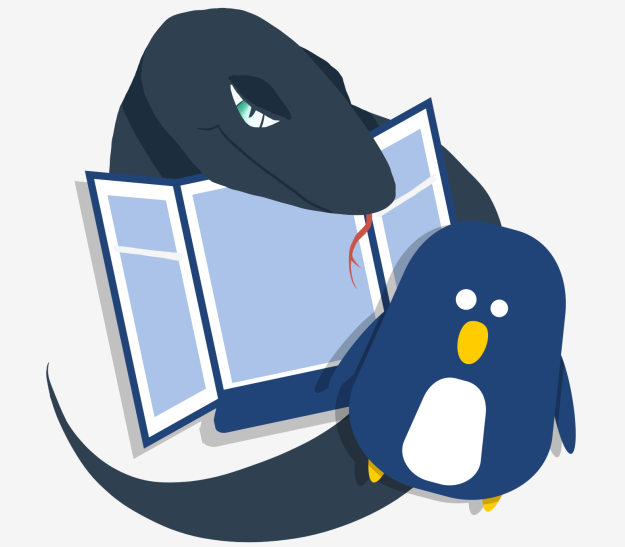

### osname

In [2]:
import os
print(os.name)

nt


### mkdir
make directory - create folder

In [ ]:
print(os.listdir())
os.makedirs("my_first_directory/my_second_directory")
os.chdir("my_first_directory")
print(os.listdir())

### cwd
where am I now? - get current directory

In [ ]:
os.makedirs("my_first_directory/my_second_directory")
os.chdir("my_first_directory")
print(os.getcwd())
os.chdir("my_second_directory")
print(os.getcwd())

### rmdir
remove directory - delete folder

In [4]:
os.mkdir("my_first_directory")
print(os.listdir())

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'my_first_directory'

In [5]:
os.rmdir("my_first_directory")
print(os.listdir())

['.git', '.ipynb_checkpoints', '2020', '2021', 'contoh.txt', 'Extra Courses', 'file.bin', 'newtext.txt', 'PE1 Module 1 - Pengenalan Python dan Bahasa Pemrograman.ipynb', 'PE1 Module 2 - Tipe Data, Variabel, Dasar Input Output, Operasi.ipynb', 'PE1 Module 3 - Operator kondisi, perulangan, list dan operasinya, bitwise, boolean.ipynb', 'PE1 Module 4 - Function Tuple Dictionaries and Data Processing.ipynb', 'PE2 Module 1 - Modules, Packages and PIP.ipynb', 'PE2 Module 2 - Exceptions, Strings, String and List Methods.ipynb', 'PE2 Module 3 - Pemrograman Berbasis Obyek.ipynb', 'PE2 Module 4 - Miscellaneous.ipynb', 'README.md']


In [6]:
returned_value = os.system("mkdir my_first_directory")
print(returned_value)

0


# <code>datetime</code> and <code>time</code> Module

In [7]:
from datetime import date

today = date.today()

print("Today:", today)
print("Year:", today.year)
print("Month:", today.month)
print("Day:", today.day)

Today: 2022-05-24
Year: 2022
Month: 5
Day: 24


In [11]:
import time

timestamp = time.time()
print("Timestamp:", timestamp)

d = date.fromtimestamp(timestamp)
print("Date:", d)

Timestamp: 1653400643.3902154
Date: 2022-05-24


### ISO format

In [12]:
d = date.fromisoformat('2022-03-01')
print(d)


2022-03-01


### Replace Method

In [14]:
d = date(1991, 2, 5)
print(d)

d = d.replace(year=2022, month=4, day=4)
print(d)


1991-02-05
2022-04-04


In [17]:
d = date(2022, 5, 24)
print(d.weekday())

1


### Creating time object

In [18]:
from datetime import time as dtime

t = dtime(14, 53, 20, 1)

print("Time:", t)
print("Hour:", t.hour)
print("Minute:", t.minute)
print("Second:", t.second)
print("Microsecond:", t.microsecond)

Time: 14:53:20.000001
Hour: 14
Minute: 53
Second: 20
Microsecond: 1


### Time Module

In [20]:
import time
class Student:
    def take_nap(self, seconds):
        print("I'm very tired. I have to take a nap. See you later.")
        time.sleep(seconds)
        print("I slept well! I feel great!")

student = Student()
student.take_nap(5)


I'm very tired. I have to take a nap. See you later.
I slept well! I feel great!


### `ctime()` function

In [22]:
timestamp = 1653400643.3902154
print(time.ctime(timestamp))

Tue May 24 20:57:23 2022


### gmtime() and localtime()

In [23]:
timestamp = 1649067868.4037936
print(time.gmtime(timestamp))
print(time.localtime(timestamp))


time.struct_time(tm_year=2022, tm_mon=4, tm_mday=4, tm_hour=10, tm_min=24, tm_sec=28, tm_wday=0, tm_yday=94, tm_isdst=0)
time.struct_time(tm_year=2022, tm_mon=4, tm_mday=4, tm_hour=17, tm_min=24, tm_sec=28, tm_wday=0, tm_yday=94, tm_isdst=0)


### asctime() and mktime()

In [24]:
timestamp = 1572879180
st = time.gmtime(timestamp)

print(time.asctime(st))
print(time.mktime((2022, 3, 4, 14, 53, 0, 0, 308, 0)))


Mon Nov  4 14:53:00 2019
1646380380.0


### Creating datetime objects

In [25]:
from datetime import datetime

dt = datetime(2022, 3, 1, 14, 53)

print("Datetime:", dt)
print("Date:", dt.date())
print("Time:", dt.time())


Datetime: 2022-03-01 14:53:00
Date: 2022-03-01
Time: 14:53:00


### Methods that return the current date and time

In [27]:
print("today:", datetime.today())
print("now:", datetime.now())
print("utcnow:", datetime.utcnow())

today: 2022-05-24 21:04:56.679830
now: 2022-05-24 21:04:56.679829
utcnow: 2022-05-24 14:04:56.679829


### Getting a timestamp

In [ ]:
dt = datetime(2020, 10, 4, 14, 55)
print("Timestamp:", dt.timestamp())

### datetime formatting

In [28]:
d = date(2020, 1, 4)
print(d.strftime('%Y/%m/%d'))

t = dtime(14, 53)
print(t.strftime("%H:%M:%S"))

dt = datetime(2020, 11, 4, 14, 53)
print(dt.strftime("%y/%B/%d %H:%M:%S"))


2020/01/04
14:53:00
20/November/04 14:53:00


### strftime() function

In [31]:
timestamp = 1572879180
st = time.gmtime(timestamp)

print(time.strftime("%Y-%m-%d %H:%M:%S", st))
print(time.strftime("%Y.%m.%d %H:%M:%S"))

2019-11-04 14:53:00
2022.05.24 21:06:31


### The strptime() method

In [32]:
from datetime import datetime
print(datetime.strptime("2019/11/04 14:53:00", "%Y/%m/%d %H:%M:%S"))

2019-11-04 14:53:00


### Date and time operations

In [33]:
d1 = date(2020, 11, 4)
d2 = date(2019, 11, 4)

print(d1 - d2)

dt1 = datetime(2020, 11, 4, 0, 0, 0)
dt2 = datetime(2019, 11, 4, 14, 53, 0)

print(dt1 - dt2)

366 days, 0:00:00
365 days, 9:07:00


### Creating timedelta objects

In [34]:
from datetime import timedelta

delta = timedelta(weeks=2, days=2, hours=3)
print(delta)

16 days, 3:00:00


In [35]:
delta = timedelta(weeks=2, days=2, hours=2)
print(delta)

delta2 = delta * 2
print(delta2)

d = date(2019, 10, 4) + delta2
print(d)

dt = datetime(2019, 10, 4, 14, 53) + delta2
print(dt)

16 days, 2:00:00
32 days, 4:00:00
2019-11-05
2019-11-05 18:53:00


# <code>calendar</code> module

In [36]:
import calendar

In [45]:
print(calendar.calendar(2022))

                                  2022

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                1  2          1  2  3  4  5  6          1  2  3  4  5  6
 3  4  5  6  7  8  9       7  8  9 10 11 12 13       7  8  9 10 11 12 13
10 11 12 13 14 15 16      14 15 16 17 18 19 20      14 15 16 17 18 19 20
17 18 19 20 21 22 23      21 22 23 24 25 26 27      21 22 23 24 25 26 27
24 25 26 27 28 29 30      28                        28 29 30 31
31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
             1  2  3                         1             1  2  3  4  5
 4  5  6  7  8  9 10       2  3  4  5  6  7  8       6  7  8  9 10 11 12
11 12 13 14 15 16 17       9 10 11 12 13 14 15      13 14 15 16 17 18 19
18 19 20 21 22 23 24      16 17 18 19 20 21 22      20 21 22 23 24 25 26
25 26 27 28 29 30         23 24 

In [52]:
print(calendar.month(2022, 5))

      May 2022
Sa Su Mo Tu We Th Fr
    1  2  3  4  5  6
 7  8  9 10 11 12 13
14 15 16 17 18 19 20
21 22 23 24 25 26 27
28 29 30 31



### setfirstweekday function

In [53]:
calendar.setfirstweekday(6)
calendar.prmonth(2022, 5)

      May 2022
Su Mo Tu We Th Fr Sa
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30 31


### The weekday() function
![day](../asets/pycalendar2.png)

In [54]:
print(calendar.weekday(2020, 12, 24))

3


### The weekheader function

In [55]:
print(calendar.weekheader(2))
print(calendar.weekheader(3))

Su Mo Tu We Th Fr Sa
Sun Mon Tue Wed Thu Fri Sat


### leapday / leapyear - kabisat
leapday = 29 Feb (pada tahun kabisat)

![leap](../asets/leapyear.png)

In [56]:
print(calendar.isleap(1900))
print(calendar.leapdays(2010, 2021))  # Up to but not including 2021.

False
3


### Creating calendar object

In [57]:
c = calendar.Calendar(calendar.SUNDAY)

for weekday in c.iterweekdays():
    print(weekday, end=" ")

6 0 1 2 3 4 5 

In [58]:
c = calendar.Calendar()

for date in c.itermonthdates(2019, 11):
    print(date, end=" ")


2019-10-28 2019-10-29 2019-10-30 2019-10-31 2019-11-01 2019-11-02 2019-11-03 2019-11-04 2019-11-05 2019-11-06 2019-11-07 2019-11-08 2019-11-09 2019-11-10 2019-11-11 2019-11-12 2019-11-13 2019-11-14 2019-11-15 2019-11-16 2019-11-17 2019-11-18 2019-11-19 2019-11-20 2019-11-21 2019-11-22 2019-11-23 2019-11-24 2019-11-25 2019-11-26 2019-11-27 2019-11-28 2019-11-29 2019-11-30 2019-12-01 

In [59]:
c = calendar.Calendar()

for iter in c.itermonthdays(2019, 11):
    print(iter, end=" ")

0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 0 

### The monthdays2calendar() method

In [60]:
c = calendar.Calendar()

for data in c.monthdays2calendar(2020, 12):
    print(data)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
[(7, 0), (8, 1), (9, 2), (10, 3), (11, 4), (12, 5), (13, 6)]
[(14, 0), (15, 1), (16, 2), (17, 3), (18, 4), (19, 5), (20, 6)]
[(21, 0), (22, 1), (23, 2), (24, 3), (25, 4), (26, 5), (27, 6)]
[(28, 0), (29, 1), (30, 2), (31, 3), (0, 4), (0, 5), (0, 6)]
